# Case Study on ANOVA


In [1]:
import pandas as pd 
import scipy.stats as st
import numpy as np

In [2]:
sales_data = pd.read_csv(r"C:\Users\shajeer\Desktop\Sales_data_zone_wise.csv")

In [3]:
sales_data.head()

,Month,Zone - A,Zone - B,Zone - C,Zone - D
0,Month - 1,1483525,1748451,1523308,2267260
1,Month - 2,1238428,1707421,2212113,1994341
2,Month - 3,1860771,2091194,1282374,1241600
3,Month - 4,1871571,1759617,2290580,2252681
4,Month - 5,1244922,1606010,1818334,1326062


In [4]:
sales_data.shape

(29, 5)

# 1. The mean sales generated by each zone.

In [5]:
print('Mean of Zone A: ',sales_data['Zone - A'].mean())
print('Mean of Zone B: ',sales_data['Zone - B'].mean())
print('Mean of Zone C: ',sales_data['Zone - C'].mean())
print('Mean of Zone D: ',sales_data['Zone - D'].mean())

Mean of Zone A:  1540493.1379310344
Mean of Zone B:  1755559.5862068965
Mean of Zone C:  1772871.0344827587
Mean of Zone D:  1842926.7586206896


# 2. Total sales generated by all the zones for each month.

In [6]:
sales_data['Total Sales'] = sales_data.sum(axis=1,numeric_only=True)

In [7]:
sales_data[['Month','Total Sales']]

,Month,Total Sales
0,Month - 1,7022544
1,Month - 2,7152303
2,Month - 3,6475939
3,Month - 4,8174449
4,Month - 5,5995328
5,Month - 6,7151387
6,Month - 7,7287108
7,Month - 8,7816299
8,Month - 9,6703395
9,Month - 10,7128210


# 3. Check whether all the zones generate the same amount of sales.
Analysis of Variance Test (ANOVA)

Tests whether the means of two or more independent samples are significantly different.

One way ANOVA
It tells whether two or more groups are similar or not based on their mean similarity and f-score.

Here, there are four treatments (Zone A, Zone B, Zone C, and Zone D), which are groups for ANOVA analysis.
Treatments are independent variable and termed as factor.
As there are four types of treatments, treatment factor has four levels.

Reponse Variable is Month
and Explanatary variables are Zones which has 4 levels.

For this experimental design, there is only factor (treatments) or independent variable to evaluate,
and therefore, one-way ANOVA method is suitable for analysis.

The hypotheses that being tested here are:
Ho: μ1 = μ2 = μ3 = μ4
Ha: not all the μ's are equal
Where:
μ1 = mean of sales of Zone A
μ2 = mean of sales of Zone B
μ3 = mean of sales of Zone C
μ4 = mean of sales of Zone D

Are the conditions that allow us to safely use the ANOVA F-test met?

Assumptions

1.Observations in each sample are independent and identically distributed (iid).
2.Observations in each sample are normally distributed.
3.Observations in each sample have the same variance.

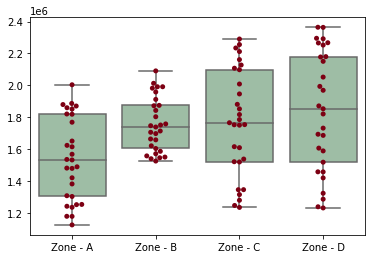

In [8]:
#1. Since the samples are monthly sales data zone wise, they are independent. 
#Total number of samples are 29 for each zone. Hence the data is balanced.

#2. Generate a boxplot to see the data distribution by treatments. Using boxplot, we can easily detect the
# differences between different treatments


import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.boxplot(data=sales_data[['Zone - A','Zone - B','Zone - C','Zone - D']],color='#99c2a2')
ax = sns.swarmplot(data=sales_data[['Zone - A','Zone - B','Zone - C','Zone - D']], color='#7d0013')
plt.show()

In [9]:
#3.As the data is drawn from normal distribution, use Bartlett’s test to check the Homogeneity of variances.
#Null hypothesis: samples from populations have equal variances.

w, pvalue = st.bartlett(sales_data['Zone - A'], sales_data['Zone - B'], sales_data['Zone - C'], sales_data['Zone - D'])
print(w, pvalue)
if pvalue<0.05:
    print('Since pvalue is <0.05, it is insignificant, we fail to reject null hypothesis and conclude that treatments have equal variances.')
else:
        print('Since pvalue is >0.05, it is significant, we reject null hypothesis and conclude that treatments have equal variances.')

17.702116144839334 0.0005066588319796149
Since pvalue is <0.05, it is insignificant, we fail to reject null hypothesis and conclude that treatments have equal variances.


In [10]:
#Proceding with ANOVA one-way as conditions for one way ANOVA F-test are met. 

fstat,pvalue = st.f_oneway(sales_data['Zone - A'],sales_data['Zone - B'],sales_data['Zone - C'],sales_data['Zone - D'])

print("p-value for 5% significance is: ", pvalue)
if pvalue<0.05:
    print("Since pvalue obtained is significant (p<0.05),we reject null hypothesis and conclude that the zones probably have different mean sales.")
else:
    print("Since pvalue obtained in not significant (p>0.05), we fail to reject null hypothesis and conclude thatthe zones probably have equal mean sales.")

p-value for 5% significance is:  0.0011827601694503335
Since pvalue obtained is significant (p<0.05),we reject null hypothesis and conclude that the zones probably have different mean sales.
